In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
real_spss_df = pd.read_csv('../data/spss_merged.csv')
real_ce_df = pd.read_csv('../data/ce_merged.csv')
gen_spss_sep = pd.read_csv('../data/gen_spss_sep.csv')
gen_spss = pd.read_csv('../data/gen_spss.csv')
gen_ce_sep = pd.read_csv('../data/gen_ce_sep.csv')
gen_ce = pd.read_csv('../data/gen_ce.csv')

In [7]:
real_spss =pickle.load(open("../models/real_spss.pkl", 'rb'))
real_ce =pickle.load(open("../models/real_ce.pkl", 'rb'))
gen_sep_spss =pickle.load(open("../models/gen_sep_spss.pkl", 'rb'))
gen_spss_model =pickle.load(open("../models/gen_spss_model.pkl", 'rb'))
gen_sep_ce_model =pickle.load(open("../models/gen_sep_ce_model.pkl", 'rb'))
gen_ce_model =pickle.load(open("../models/gen_ce_model.pkl", 'rb'))

In [8]:
real_spss_df.head()

DMSex  WorkSta  DVAge  Income  Sector  NumChild  NumAdult  DMFlag  dmonth  \
0    2.0      2.0   48.0  3000.0     2.0       1.0       3.0     2.0    12.0   
1    2.0      2.0   48.0  3000.0     2.0       1.0       3.0     2.0    12.0   
2    2.0      2.0   48.0  3000.0     2.0       1.0       3.0     2.0    12.0   
3    2.0      2.0   48.0  3000.0     2.0       1.0       3.0     2.0    12.0   
4    2.0      2.0   48.0  3000.0     2.0       1.0       3.0     2.0    12.0   

   ddayw  WhereStart  WhereEnd  RushedD  KindOfDay  dia_wt_a  Trip   tid  \
0    1.0         1.0       1.0      2.0        3.0  2.021182   1.0   1.0   
1    1.0         1.0       1.0      2.0        3.0  2.021182   1.0  12.0   
2    1.0         1.0       1.0      2.0        3.0  2.021182   1.0  13.0   
3    1.0         1.0       1.0      2.0        3.0  2.021182   1.0  14.0   
4    1.0         1.0       1.0      2.0        3.0  2.021182   1.0  15.0   

   Device  WhereWhen  whatdoing  eptime  
0     0.0       11.0      110.0   110.0  
1     0.0       11.0     8219.0    10.0  
2     0.0       11.0      310.0    10.0  
3     0.0       11.0     3210.0    10.0  
4     1.0       11.0     3110.0    10.0

In [9]:
gen_spss.head()

DMSex  WorkSta  DVAge   Income  Sector  NumChild  NumAdult  DMFlag  dmonth  \
0    2.0     10.0   51.0     -9.0     2.0       0.0       4.0     1.0     5.0   
1    2.0      4.0   26.0   6858.0     0.0       1.0       3.0     2.0     8.0   
2    2.0     -1.0   24.0  42418.0     1.0       1.0       1.0     2.0     9.0   
3    2.0     -1.0   51.0     -9.0     1.0       1.0       1.0     2.0     4.0   
4    2.0      0.0   40.0  11719.0     0.0       1.0       2.0     2.0     8.0   

   ddayw  WhereStart  WhereEnd  RushedD  KindOfDay  dia_wt_a  Trip   tid  \
0    1.0         2.0       2.0      2.0        7.0  1.606123   3.0  33.0   
1    2.0         1.0       1.0      2.0        3.0  1.507157   3.0  64.0   
2    1.0         2.0      -1.0      2.0        5.0  1.176737   0.0  32.0   
3    1.0        -1.0      -2.0      2.0        3.0  2.096352  -0.0  55.0   
4    2.0        -0.0       2.0     -2.0        1.0  0.868506   3.0  44.0   

   Device  WhereWhen  whatdoing  eptime  
0    -2.0       36.0       67.0    10.0  
1     1.0        0.0     1134.0   100.0  
2     1.0       19.0      486.0    10.0  
3    -3.0       23.0     3387.0    30.0  
4     1.0       18.0     6016.0   130.0

In [10]:
gen_spss_sep.head()

DMSex  WorkSta  DVAge   Income  Sector  NumChild  NumAdult  DMFlag  dmonth  \
0    2.0      2.0   29.0    385.0    -2.0       1.0       2.0     1.0     1.0   
1    1.0      1.0   48.0   9441.0    -1.0       1.0       1.0     2.0     5.0   
2    2.0      7.0   13.0  37772.0     0.0       2.0       1.0     2.0     7.0   
3    2.0      2.0   30.0     -9.0     0.0       2.0       2.0     1.0     8.0   
4    2.0      2.0   28.0  11599.0     0.0       3.0       1.0     1.0    12.0   

   ddayw  WhereStart  WhereEnd  RushedD  KindOfDay  dia_wt_a  Trip    tid  \
0    2.0        -0.0       0.0      0.0        5.0  1.161157   0.0  106.0   
1    2.0        -2.0      -2.0     -2.0        1.0  0.338608  -3.0   70.0   
2    2.0         0.0       0.0     -1.0        1.0  0.130491   3.0   71.0   
3    3.0        -2.0      -2.0     -3.0       -2.0  1.333154  -2.0   41.0   
4    2.0         2.0       2.0      1.0        4.0  0.616119   3.0   61.0   

   Device  WhereWhen  whatdoing  eptime  
0     1.0       23.0     4629.0    50.0  
1     1.0       24.0     7975.0    30.0  
2    -3.0       14.0      120.0    50.0  
3     0.0       10.0        0.0    90.0  
4     1.0       -9.0      710.0   190.0

In [11]:
real_ce_df.head()

DVAge  NumChild  NumAdult  dia_wt_a  eptime  DMSex_count  WorkSta_count  \
0     48         1         3  2.021182   110.0       339140         245628   
1     48         1         3  2.021182    10.0       339140         245628   
2     48         1         3  2.021182    10.0       339140         245628   
3     48         1         3  2.021182    10.0       339140         245628   
4     48         1         3  2.021182    10.0       339140         245628   

   Income_count  Sector_count  DMFlag_count  dmonth_count  ddayw_count  \
0         36312        140226         64345         31891       299788   
1         36312        140226         64345         31891       299788   
2         36312        140226         64345         31891       299788   
3         36312        140226         64345         31891       299788   
4         36312        140226         64345         31891       299788   

   WhereStart_count  WhereEnd_count  RushedD_count  KindOfDay_count  \
0            543584          536135         446963           193731   
1            543584          536135         446963           193731   
2            543584          536135         446963           193731   
3            543584          536135         446963           193731   
4            543584          536135         446963           193731   

   Trip_count  tid_count  Device_count  WhereWhen_count  whatdoing_count  
0      489350      16531        463457           397040            55365  
1      489350       1068        463457           397040             3176  
2      489350       2315        463457           397040            52985  
3      489350       1892        463457           397040            11621  
4      489350       1925         86533           397040            30958

In [12]:
gen_ce_sep.head()

DVAge  NumChild  NumAdult  DMSex_count  WorkSta_count  Income_count  \
0     41         1         1         5551           3072           896   
1     33         0         3         5901           2177           138   
2      5         0         2         5520           1167           959   
3     56         1         3         5590           4248           863   
4     65         0         5         5520           3383          1264   

   Sector_count  dia_wt_a  eptime  DMFlag_count  dmonth_count  ddayw_count  \
0          5142  0.546445    90.0        298238         41532       139314   
1          3931  1.063959    10.0        300403         55118       294372   
2          5142  1.174317   170.0        156773         53441       220994   
3          2654  1.403319    10.0        467138         62305       202098   
4          4462  1.261986    10.0        352240         63033       272464   

   WhereStart_count  WhereEnd_count  RushedD_count  KindOfDay_count  \
0            503086          536135         367981           193731   
1            527459          527528         303227            15310   
2            417325          270216         270090            72604   
3            295043          446327         244224           141671   
4            483478          536135         190880           162617   

   Trip_count  tid_count  Device_count  WhereWhen_count  whatdoing_count  
0      294666       7824        463457           397040            49027  
1      210639       5211        156148           233989            46936  
2      489350       4471        354771            86724             1481  
3       67699       4114        277020               16            25717  
4      376356       1105        463457           397040            55145

In [13]:
gen_ce.head()

DVAge  NumChild  NumAdult  dia_wt_a  eptime  DMSex_count  WorkSta_count  \
0     66         2         2  1.423749    50.0       295049          97344   
1     41         2         2  0.524670    10.0       339140         130819   
2     32         1         2  1.867317    30.0       248403         121419   
3     58         0         2  1.425323    10.0       315359         245628   
4     40         1         3  1.063106    10.0       266731         189169   

   Income_count  Sector_count  DMFlag_count  dmonth_count  ddayw_count  \
0         11309        170307        419993         47845       268847   
1             9        192854        382336         40027       211491   
2         49250        233911        130368         58034       299788   
3         58803        244350        467138         52050       260788   
4         18736        268047        122517         37848       179294   

   WhereStart_count  WhereEnd_count  RushedD_count  KindOfDay_count  \
0            543584          402265         446963           163466   
1            312765          515928         417646           135970   
2            504478          387754         206524            33536   
3            530918          346350          15184           182274   
4            250488          536135         384175           186492   

   Trip_count  tid_count  Device_count  WhereWhen_count  whatdoing_count  
0      489350       6238        463457           397040            39504  
1      489350       2928        302266           168769             9850  
2      410366       6769        319857           241514            56866  
3      202167       7723        463457            12774            18800  
4      358629       3624        463457            41380                1

In [14]:
# real_data_model =pickle.load(open("../models/real_test_train_new.pkl", 'rb'))
# synth_data_model =pickle.load(open("../models/gen_test_train_new.pkl", 'rb'))

In [15]:
# real_df = pd.read_csv('../data/long_individual_merged_test.csv')
# synth_df = pd.read_csv('../data/long_individual_merged_short.csv')

In [16]:
# print(real_df.shape)
# print(synth_df.shape)

In [17]:
def split_data(df):
    y = df.iloc[:,-1].values
    X = df.drop('eptime', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test

In [18]:
sns.set(rc={"figure.figsize":(20, 8)}) #width=3, #height=4

In [19]:
sns.pairplot(real_spss_df)

Error in callback <function flush_figures at 0x0000022127136AF0> (for post_execute):


KeyboardInterrupt: 

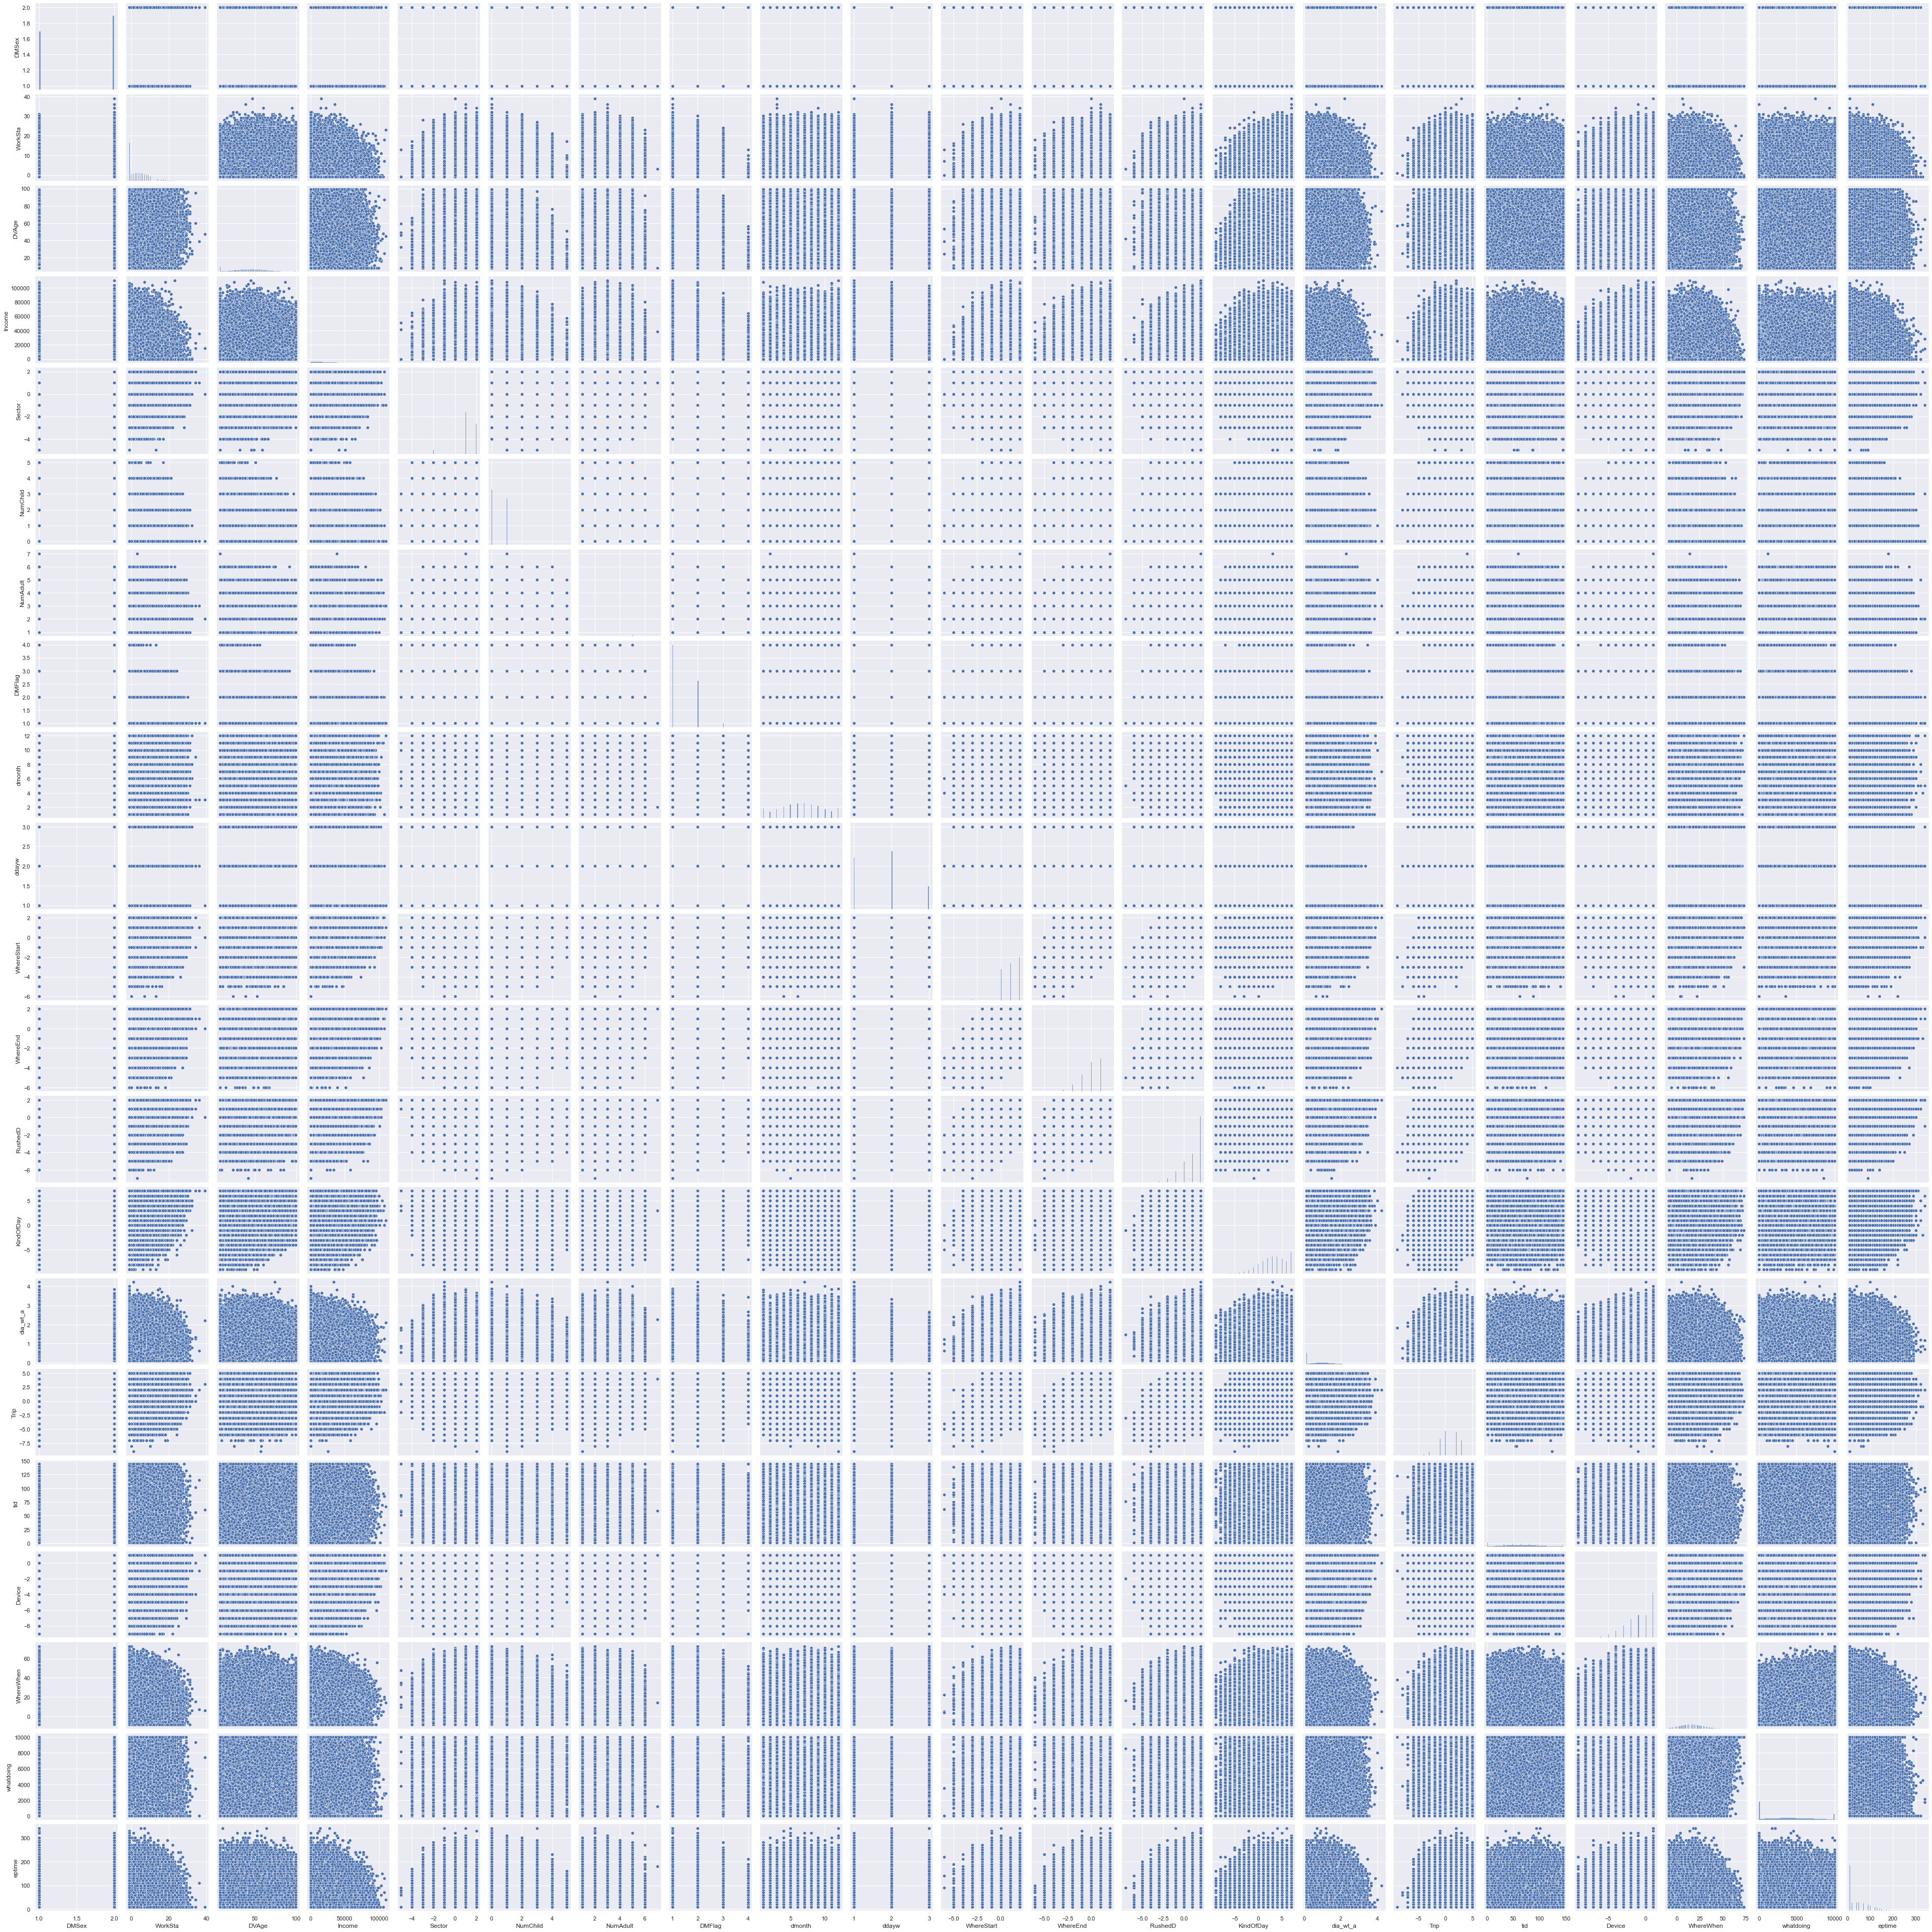

In [ ]:
sns.pairplot(gen_spss)

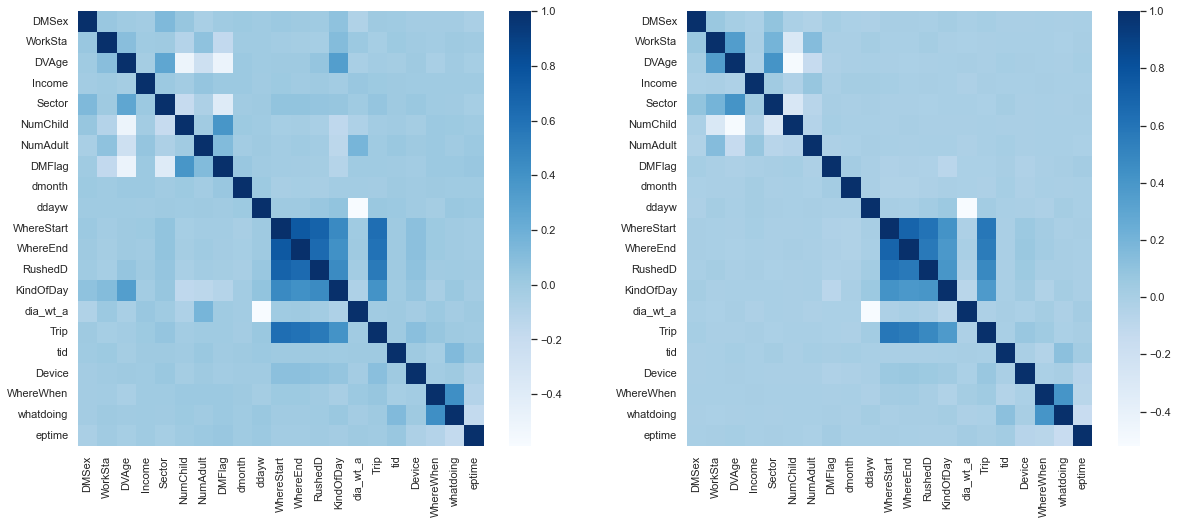

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(real_spss_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_spss_sep.corr(), ax=axs[1], cmap="Blues")
plt.show()

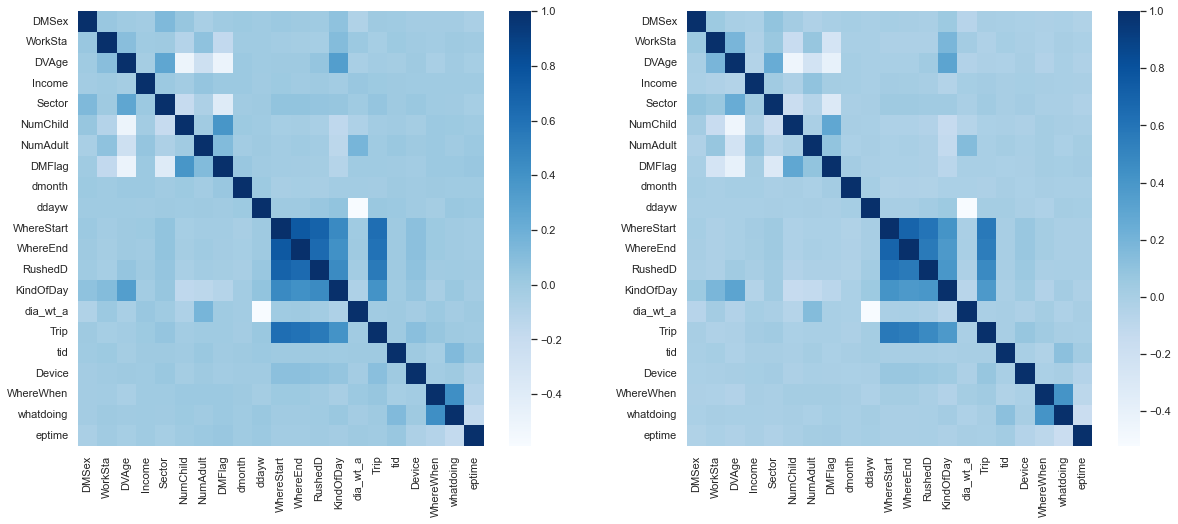

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(real_spss_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_spss.corr(), ax=axs[1], cmap="Blues")
plt.show()

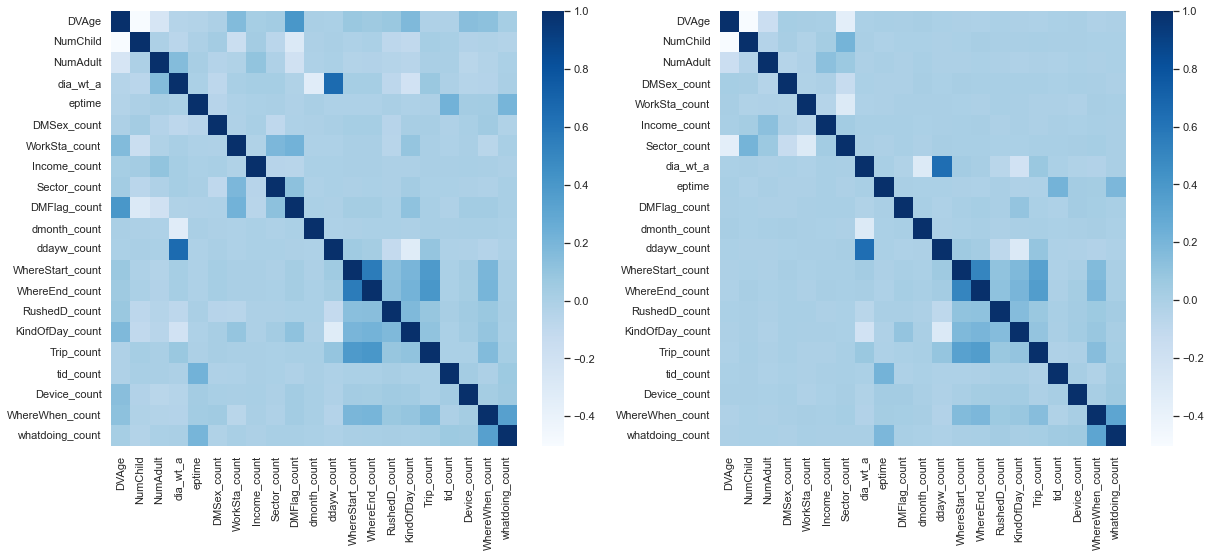

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(real_ce_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_ce_sep.corr(), ax=axs[1], cmap="Blues")
plt.show()

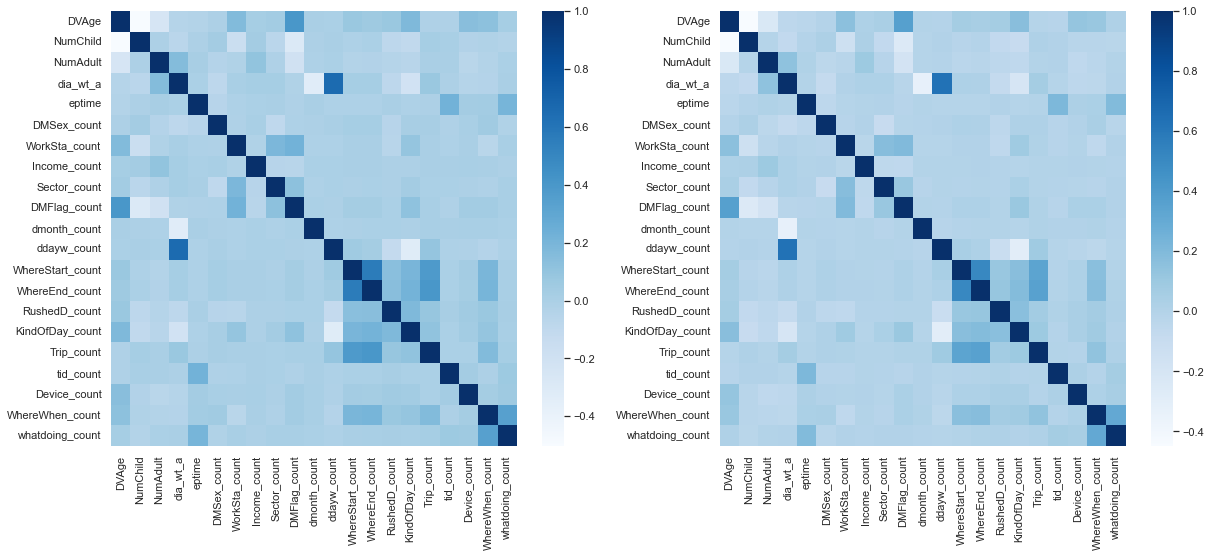

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(real_ce_df.corr(), ax=axs[0], cmap="Blues")
sns.heatmap(gen_ce.corr(), ax=axs[1], cmap="Blues")
plt.show()

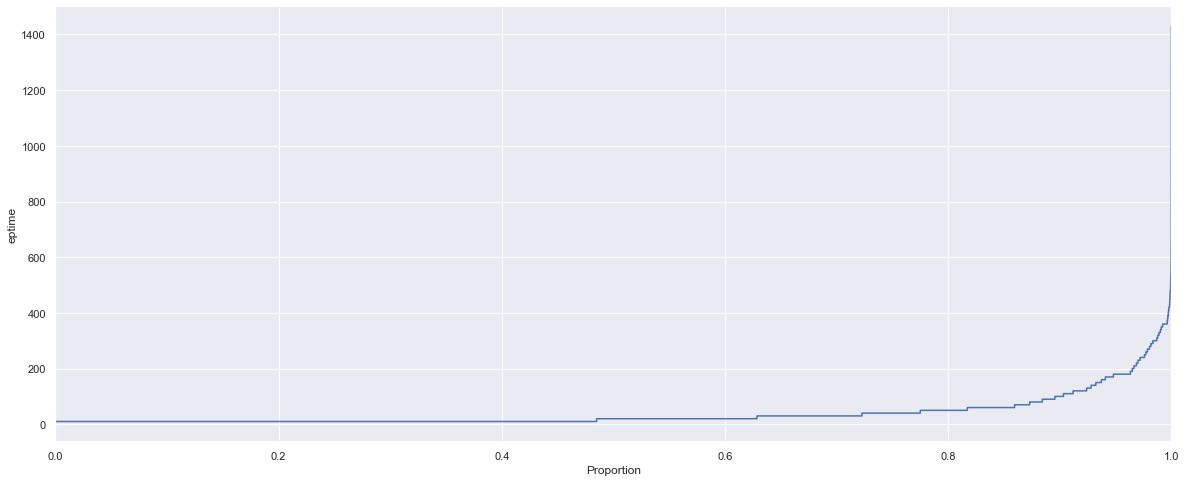

In [20]:
sns.ecdfplot(data=real_spss_df, y="eptime")
plt.show()

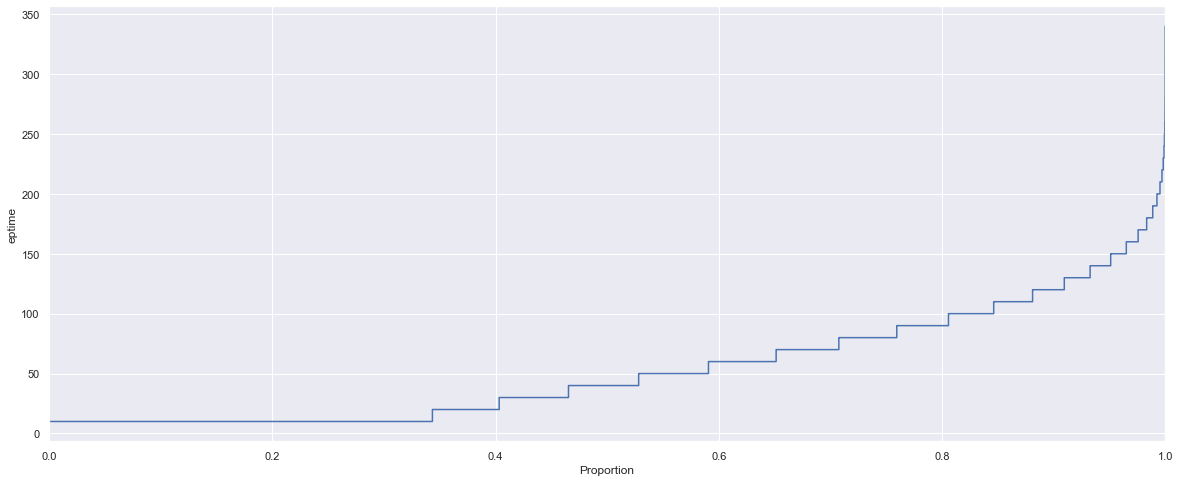

In [21]:
sns.ecdfplot(gen_spss, y="eptime")
plt.show()

In [ ]:
_, real_X_test_spss, _, real_y_test_spss = split_data(real_spss_df)
_, real_X_test_ce, _, real_y_test_ce = split_data(real_ce_df)
_, gen_sep_X_test_spss, _, gen_sep_y_test_spss = split_data(gen_spss_sep)
_, gen_X_test_spss, _, gen_y_test_spss = split_data(gen_spss)
_, gen_sep_X_test_ce, _, gen_sep_y_test_ce = split_data(gen_ce_sep)
_, gen_X_test_ce, _, gen_y_test_ce = split_data(gen_ce)

In [ ]:
# real_spss_df = pd.read_csv('../data/spss_merged.csv')
# real_ce_df = pd.read_csv('../data/ce_merged.csv')
# gen_spss_sep = pd.read_csv('../data/gen_spss_sep.csv')
# gen_spss = pd.read_csv('../data/gen_spss.csv')
# gen_ce_sep = pd.read_csv('../data/gen_ce_sep.csv')
# gen_ce = pd.read_csv('../data/gen_ce.csv')

In [ ]:
def prediction(model, X_test, y_test):
    X_test = normalize(X_test, norm='l2')
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = mse**.5

    print(f'Mean Sq Error: {mse}')
    print(f'Root Mean Sq Error: {rmse}')
    print(f'Mean Abs Error: {mae}')
    print(f'R-square: {r2}')

    return predictions

# dont touch below cells for now

In [ ]:
real_pred_spss = prediction(real_X_test_spss, real_y_test_spss)

Mean Sq Error: 2614.280939732206
Root Mean Sq Error: 51.13003950450465
Mean Abs Error: 30.07174180254391
R-square: 0.3423631784887451


In [ ]:
synth_pred = prediction(synth_X_test, synth_y_test)

Mean Sq Error: 3483.770973733086
Root Mean Sq Error: 59.02347815685794
Mean Abs Error: 46.51493764924383
R-square: -0.5547223573766731


# dont touch above cells for now

In [ ]:
real_pred_spss = prediction(real_spss, real_X_test_spss, real_y_test_spss)

Mean Sq Error: 2176.068595633424
Root Mean Sq Error: 46.648350406347966
Mean Abs Error: 25.775229877520147
R-square: 0.4525979159801332


In [ ]:
real_pred_ce = prediction(real_ce, real_X_test_ce, real_y_test_ce)

Mean Sq Error: 1244761692.4603457
Root Mean Sq Error: 35281.180428953136
Mean Abs Error: 26252.420020080117
R-square: -1.2415784881935057


In [ ]:
gen_sep_pred_ce = prediction(gen_sep_spss, gen_sep_X_test_spss, gen_sep_y_test_spss)

Mean Sq Error: 2298.5575278514584
Root Mean Sq Error: 47.94327406270308
Mean Abs Error: 39.41267904509284
R-square: -0.027834717779934515


In [ ]:
gen_spss_pred = prediction(gen_spss_model, gen_X_test_spss, gen_y_test_spss)

Mean Sq Error: 2189.053231419877
Root Mean Sq Error: 46.78731913050669
Mean Abs Error: 38.62222290989737
R-square: 0.0007399230221056818


In [ ]:
gen_sep_pred_ce = prediction(gen_sep_ce_model, gen_sep_X_test_ce, gen_sep_y_test_ce)

Mean Sq Error: 1083551247.5948315
Root Mean Sq Error: 32917.33961903409
Mean Abs Error: 26895.59304855399
R-square: -2.00102281688483


In [ ]:
gen_pred_ce = prediction(gen_ce_model, gen_X_test_ce, gen_y_test_ce)

Mean Sq Error: 1119119014.9840918
Root Mean Sq Error: 33453.236240819686
Mean Abs Error: 27253.86142555057
R-square: -1.9664270944984223


c:\DataScience\Python\machine_learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

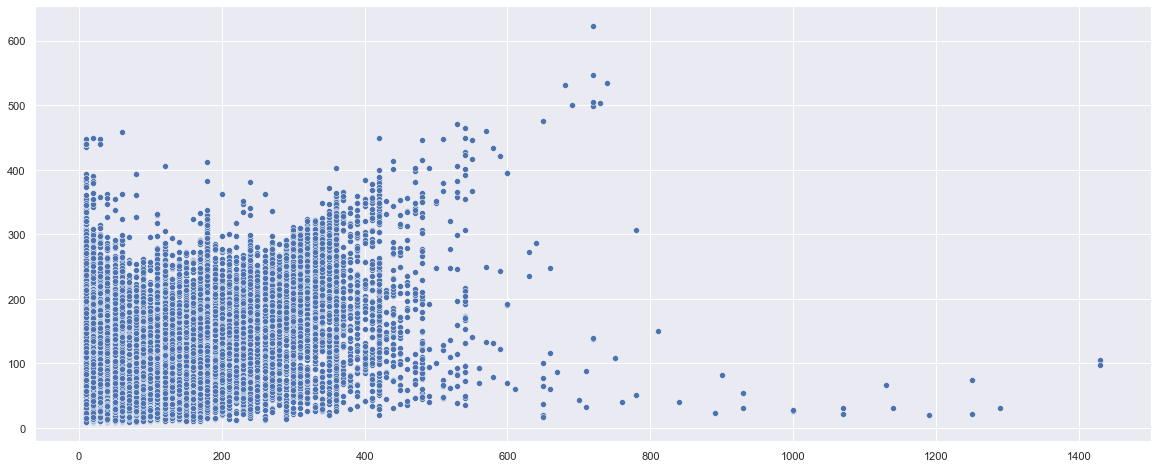

In [ ]:
sns.scatterplot(real_y_test, real_pred)


c:\DataScience\Python\machine_learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

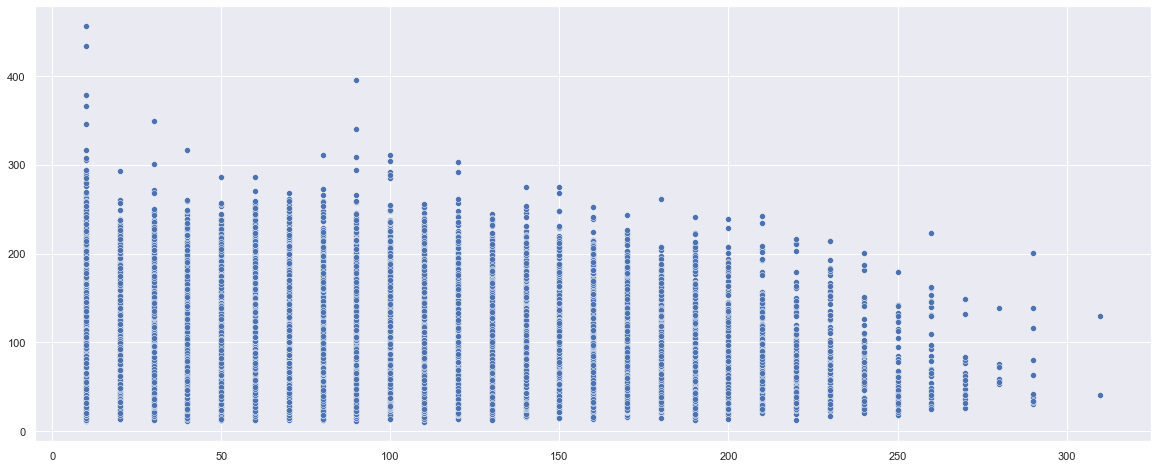

In [ ]:
sns.scatterplot(synth_y_test, synth_pred)
